In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

In [21]:
app_review = reviews_all(
    'com.tripadvisor.tripadvisor',
    sleep_milliseconds = 0,
    lang = 'vi', 
    country = 'vn', 
    sort = Sort.MOST_RELEVANT
)

df_reviews = pd.DataFrame(np.array(app_review),columns = ['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))

df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,961993f1-dd49-4835-98e7-9148bcc1c7a4,TRẦN TUẤN ĐẠT,https://play-lh.googleusercontent.com/a-/ACB-R...,Ok,5,0,52.2,2023-04-30 12:14:26,None,None
1,6a06e014-48c3-4cf9-8889-a1d1b41c614f,Eddie Thanh Tran,https://play-lh.googleusercontent.com/a-/ACB-R...,Ok,5,0,52.1,2023-04-24 01:17:43,None,None
2,75aa927d-4b86-437b-9cae-b5a4753e494f,NGUYỄN HẢI TẢO,https://play-lh.googleusercontent.com/a-/ACB-R...,EVT travel đã sử dụng tại Hồ Chí Minhvà đánh g...,5,0,52.0,2023-04-18 16:27:23,None,None
3,906f02d7-54b8-4f63-a21c-a42f0a7ce6e1,Phong thương IMAGE,https://play-lh.googleusercontent.com/a-/ACB-R...,Đang theo dõi,5,0,52.0,2023-04-19 10:57:53,None,None
4,8a7a0131-c0d8-42d6-873f-5b60aead0ffc,quy duy nguyen,https://play-lh.googleusercontent.com/a-/ACB-R...,Good app,5,1,51.9,2023-04-12 08:45:57,None,None


In [22]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2278 non-null   object        
 1   userName              2278 non-null   object        
 2   userImage             2278 non-null   object        
 3   content               2268 non-null   object        
 4   score                 2278 non-null   int64         
 5   thumbsUpCount         2278 non-null   int64         
 6   reviewCreatedVersion  1900 non-null   object        
 7   at                    2278 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 178.1+ KB


In [23]:
df_reviews['score'].value_counts()

5    1515
1     396
4     271
3      71
2      25
Name: score, dtype: int64

<AxesSubplot:ylabel='score'>

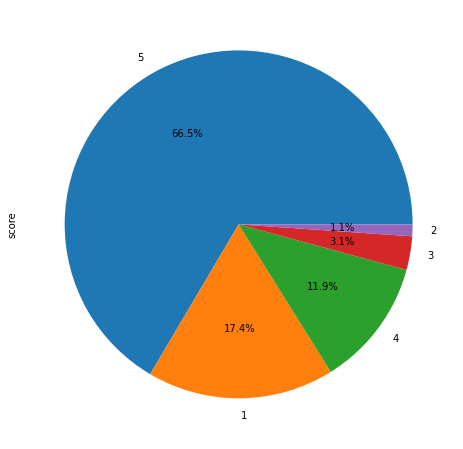

In [24]:
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%')

In [25]:
file_name = 'reviewAppTripadvisor_new.csv'
df_reviews_content = pd.DataFrame(df_reviews, columns=['userName','content','at','score','thumbsUpCount'])
df_reviews_content['address'] = "Tripadvisor"
df_reviews_content.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')
df_reviews_content.head()

DataFrame is written to Excel File successfully.


,userName,content,at,score,thumbsUpCount,address
0,TRẦN TUẤN ĐẠT,Ok,2023-04-30 12:14:26,5,0,Tripadvisor
1,Eddie Thanh Tran,Ok,2023-04-24 01:17:43,5,0,Tripadvisor
2,NGUYỄN HẢI TẢO,EVT travel đã sử dụng tại Hồ Chí Minhvà đánh g...,2023-04-18 16:27:23,5,0,Tripadvisor
3,Phong thương IMAGE,Đang theo dõi,2023-04-19 10:57:53,5,0,Tripadvisor
4,quy duy nguyen,Good app,2023-04-12 08:45:57,5,1,Tripadvisor
